Кирилл Лалаянц, R33352

# Лабораторная работа No10
# В -- 11
## Линейно-квадратичные радости

Импорт необходимых для работы библиотек. 

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os
import scipy
# import cvxpy 
# import array_to_latex as a2l
# plt.rcParams['text.usetex'] = True

SAVE_PATH = 'tex-report/src/figs/'
os.makedirs(SAVE_PATH, exist_ok=True)
np.set_printoptions(precision=2)
sympy.init_printing()
p = sympy.Symbol("p")
s = sympy.Symbol("s")
t = sympy.Symbol("t")
w = sympy.Symbol("w")
I = sympy.I


def get_t(end_t = 10, dt=0.001, start_t = 0):
    return np.linspace(start_t, end_t, int(end_t / dt))

In [67]:
def get_controllability_matrix(A, B):
    ctrb_m = np.hstack((B, *[(np.linalg.matrix_power(A, i)) @ B for i in range(1, A.shape[0])]))
    assert np.allclose(control.ctrb(A, B), ctrb_m), 'Smth wrong'
    return ctrb_m

def get_observability_matrix(A, C):
    obsv_m = np.vstack((C, *[C @ np.linalg.matrix_power(A, i) for i in range(1, A.shape[0])]))
    assert np.allclose(control.obsv(A, C), obsv_m), 'Smth wrong'
    return obsv_m

def check_controllability(A, B):
    U = get_controllability_matrix(A, B)
    print(f'RankU = {np.linalg.matrix_rank(U)}')
    return np.linalg.matrix_rank(U) == A.shape[0]
        
def check_controllability_eigens(A, B):
    eig_vals = np.linalg.eigvals(A)
    print(f'Eigen values of A:')
    for val in eig_vals:
        print(f"   {np.array([val])}: {'controllable' if np.linalg.matrix_rank(np.hstack(((A - val * np.eye(A.shape[0])), B))) == A.shape[0] else 'not controllable'}")

def check_observability(C, A):
    V = get_observability_matrix(A, C)
    print(f'RankV = {np.linalg.matrix_rank(V)}')
    return np.linalg.matrix_rank(V) == A.shape[0]

def check_observability_eigens(C, A):
    eig_vals = np.linalg.eigvals(A)
    print(f'Eigen values of A:')
    for val in eig_vals:
        print(f"   {np.array([val])}: {'observable' if np.linalg.matrix_rank(np.vstack(((A - val * np.eye(A.shape[0])), C))) == A.shape[0] else 'not observable'}")


In [68]:
A = np.array([
    [-6, 19, 10, -13],
    [0, -9, 0, 6],
    [-4, 8, 6, -7],
    [0, -15, 0, 9]
])

B = np.array([[4, 0], 
                    [2, 0], 
                    [6, 0], 
                    [4, 0]])

C= np.array([[-3, 9, 3, -6], 
                    [0, -2, 0, 1]])

D= np.array([[0, 0], 
                    [0, 2]])

## Task1

In [99]:
task1_x0 = np.ones(A.shape[0]).reshape(-1, 1)
values = np.array([1e-1, 1, 1e2])
dt = 0.001
ts = get_t(15, dt=dt)

======= Q = 0.1; R = 100.0 ===========
K = array([[-0.08,  0.26,  0.17, -0.17],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])
P = [[  3.83 -14.16  -5.82   9.93]
 [-14.16  77.45  22.94 -52.39]
 [ -5.82  22.94   9.92 -16.4 ]
 [  9.93 -52.39 -16.4   36.67]]
eig(A+BK) = [-0.17+2.01j -0.17-2.01j -0.09+2.99j -0.09-2.99j]
J_theory = [[16.09]]
(4, 15000) (2, 15000)
J_real = 15.530087047776194
======= Q = 1.0; R = 1.0 ===========
K = array([[-1.2 , 10.88,  3.57, -6.8 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])
P = [[  2.76 -18.96  -4.19  12.71]
 [-18.96 142.76  31.41 -96.83]
 [ -4.19  31.41   7.97 -22.57]
 [ 12.71 -96.83 -22.57  67.86]]
eig(A+BK) = [-0.29+2.68j -0.29-2.68j -3.9 +0.j   -6.7 +0.j  ]
J_theory = [[24.5]]
(4, 15000) (2, 15000)
J_real = 24.518946805045434
======= Q = 100.0; R = 0.1 ===========
K = array([[ -17.9 ,  309.76,   85.33, -197.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ]])
P = [[  254.65 -1769.5   -373.48  1189.87]
 [-1769.5  13070.6   2774.84 -8920.32]
 [ -373.48  2774.84   674.8

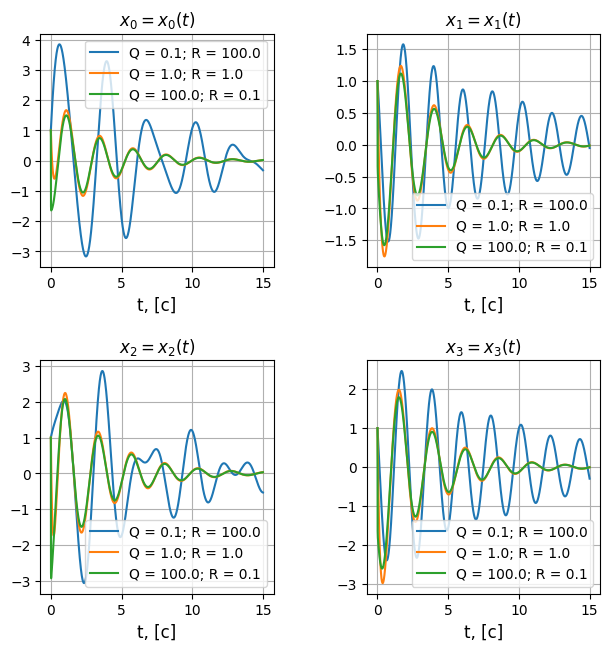

In [100]:
task1_reses = []
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for indx in range(values.shape[0]):
    print(f'======= Q = {values[indx]}; R = {values[::-1][indx]} ===========')
    Q = np.diag(np.ones((A.shape[0]))) * values[indx]
    R = np.diag(np.ones((B.shape[1]))) * values[::-1][indx]
    K, S, E = control.lqr(A, B, Q, R)
    print(f'{K = }')
    print(f'P = {S}')
    print(f'eig(A+BK) = {E}')
    print(f"J_theory = {task1_x0.T @ S @ task1_x0}")
    
    ss = control.ss(A - B@K, A*0, A*0, A*0)
    res = control.forced_response(ss, X0=task1_x0, T=ts)
    
    xs = res.states
    us = - K @ xs
    print(xs.shape, us.shape)
    print(f"J_real = {dt * np.sum(np.diagonal(xs.T @ Q @ xs + us.T @ R @ us))}")
    
    

    
    for i, state in enumerate(res.states):
        axs[i//2, i%2].plot(ts, state, label=f'Q = {values[indx]}; R = {values[::-1][indx]}') 

for i in range(4):
    axs[i//2, i%2].set_xlabel(f"t, [c]", fontsize=12)
    axs[i//2, i%2].set_title(f"$x_{i} = x_{i}(t)$", fontsize=12)
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].legend()
plt.savefig(f'{SAVE_PATH}/task1_states.jpg')
    